 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [113]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [114]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")

#sp_path = Path("Resources/sp_tsx_history.csv")

whale_returns = pd.read_csv(whale_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending=True,inplace=True)
#sp_tsx_history = pd.read_csv(sp_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [115]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [116]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [117]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, index_col = "Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending=True, inplace=True)

In [118]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [119]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [120]:
# Reading S&P TSX 60 Closing Prices
sp_path = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history.sort_index(ascending=True,inplace=True)

In [121]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [122]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")
sp_tsx_history["Close"]=sp_tsx_history["Close"].str.replace(",", "").astype("float")\

sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [123]:
# Calculate Daily Returns
sp_tsx_history = sp_tsx_history.pct_change()

In [124]:
# Drop nulls
sp_tsx_history.dropna(inplace=True)
sp_tsx_history.isnull().sum()

Close    0
dtype: int64

In [125]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history.rename(columns = {"Close":"S&P500"}, inplace=True)
sp_tsx_history.head()

,S&P500
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [126]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([whale_returns,algo_returns,sp_tsx_history], axis="columns", join="inner")
df_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

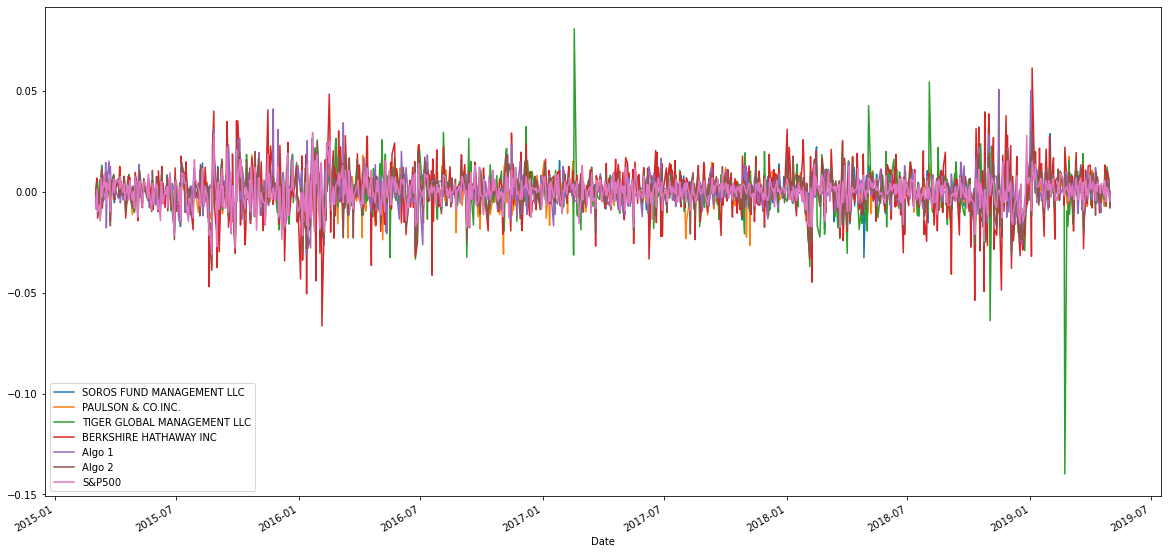

In [127]:
# Plot daily returns of all portfolios
df_daily.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

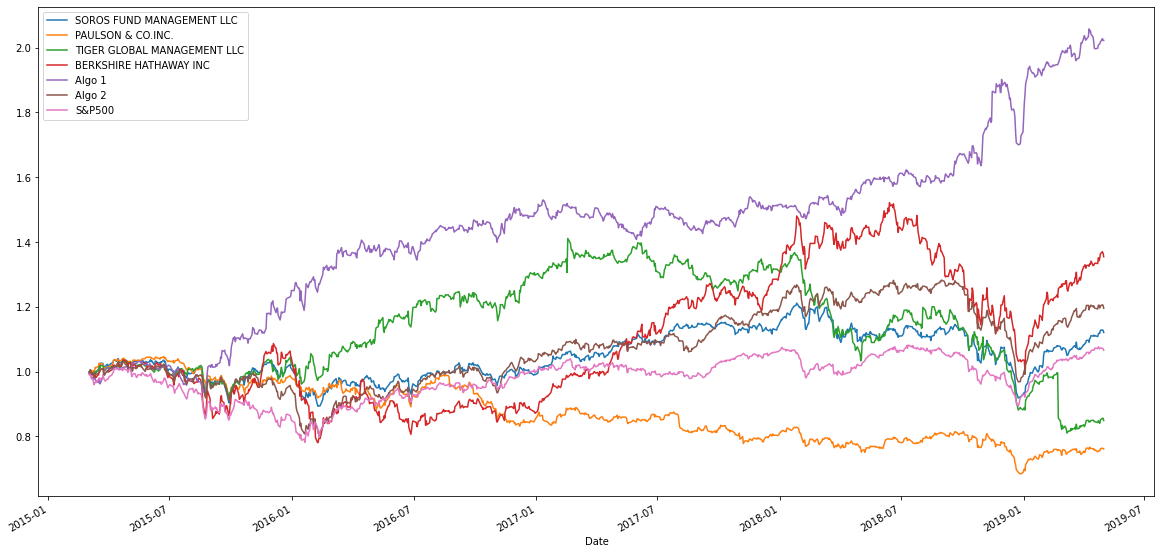

In [128]:
# Calculate cumulative returns of all portfolios
df_cum = (1+df_daily).cumprod()
# Plot cumulative returns
df_cum.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


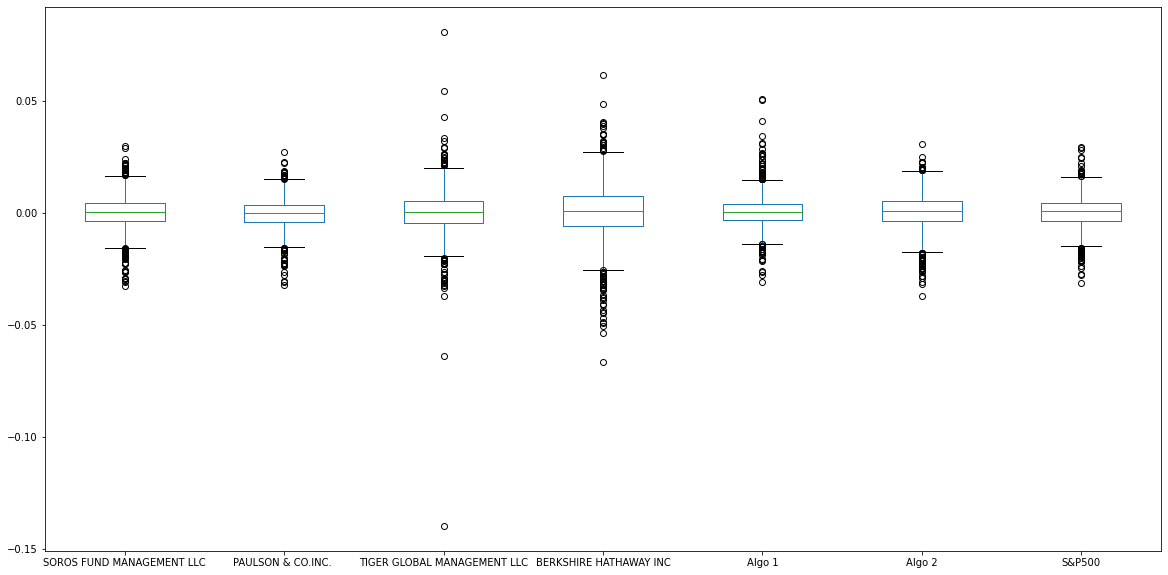

In [129]:
# Box plot to visually show risk
df_daily.plot(kind="box",figsize = (20,10))

### Calculate Standard Deviations

In [130]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P500,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [131]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["S&P500"]["std"]]
higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [132]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std * np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P500,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

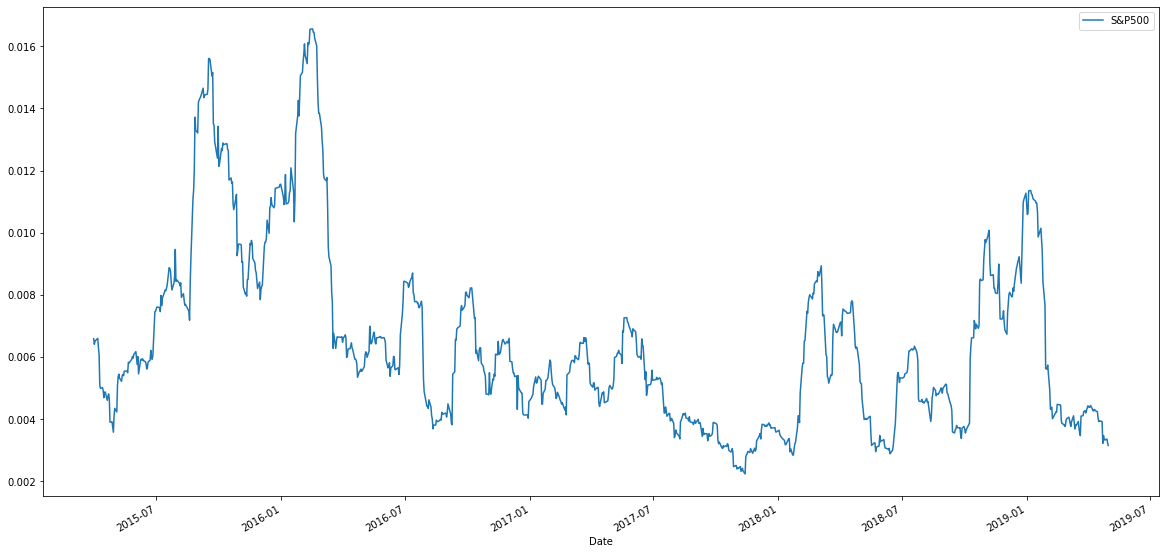

In [133]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp_rolling_21 = df_daily[["S&P500"]].rolling(window=21).std()

# Plot the rolling standard deviation
sp_rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

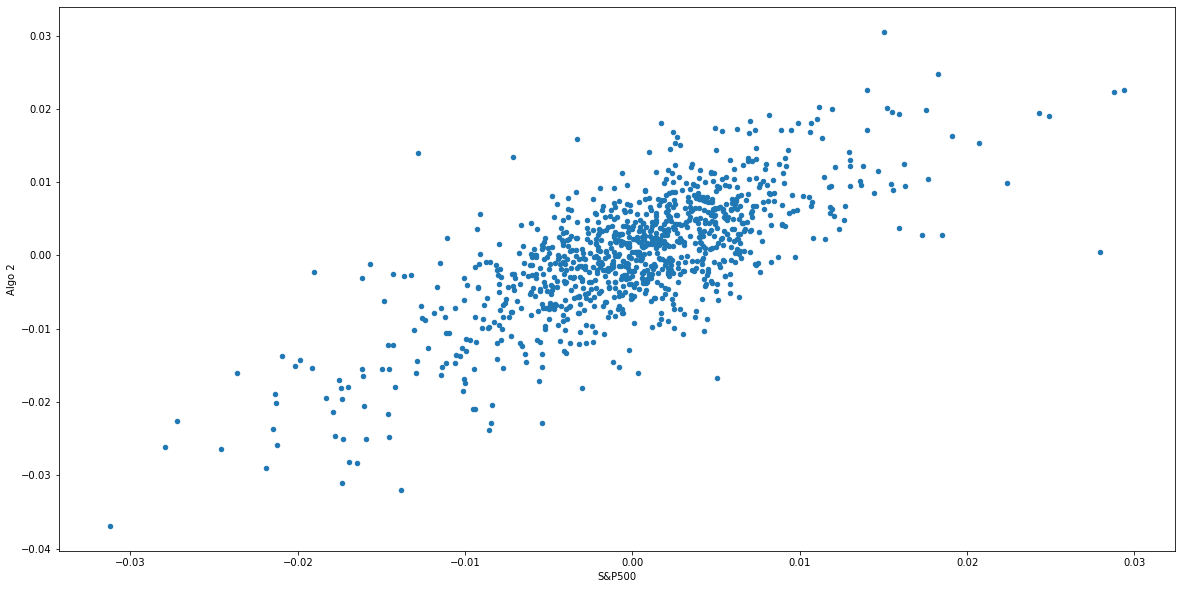

In [134]:
# Calculate the correlation
correlation = df_daily.corr()
# Display de correlation matrix
correlation
df_daily.plot(kind = "scatter", y = "Algo 2", x = "S&P500", figsize = (20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

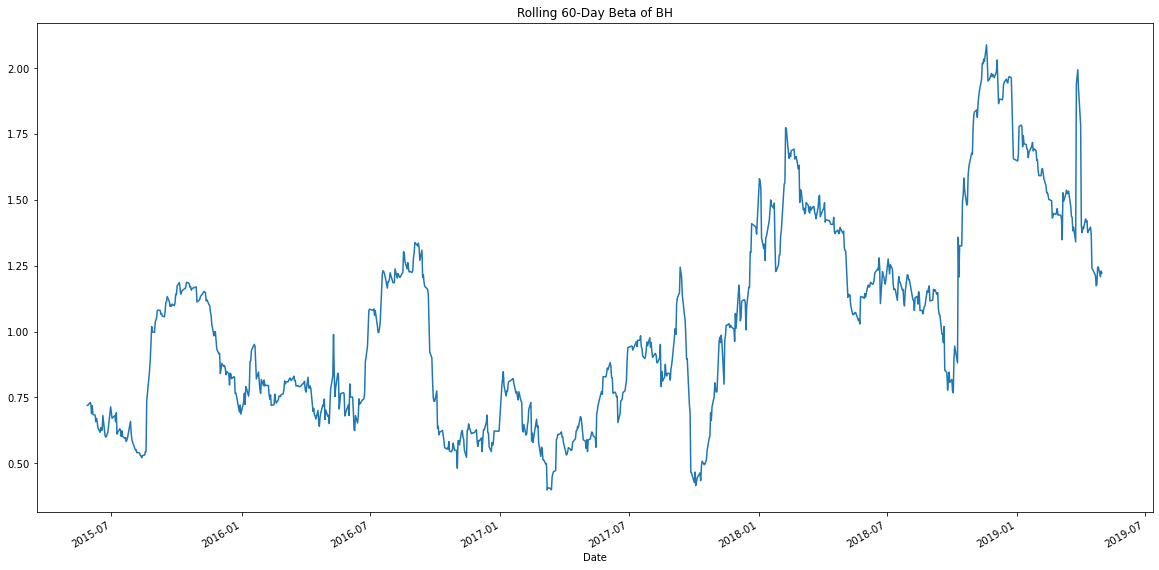

In [135]:
# Calculate covariance of a single portfolio
rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily["S&P500"])
# Calculate variance of S&P TSX
rolling_variance = df_daily['S&P500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of BH")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

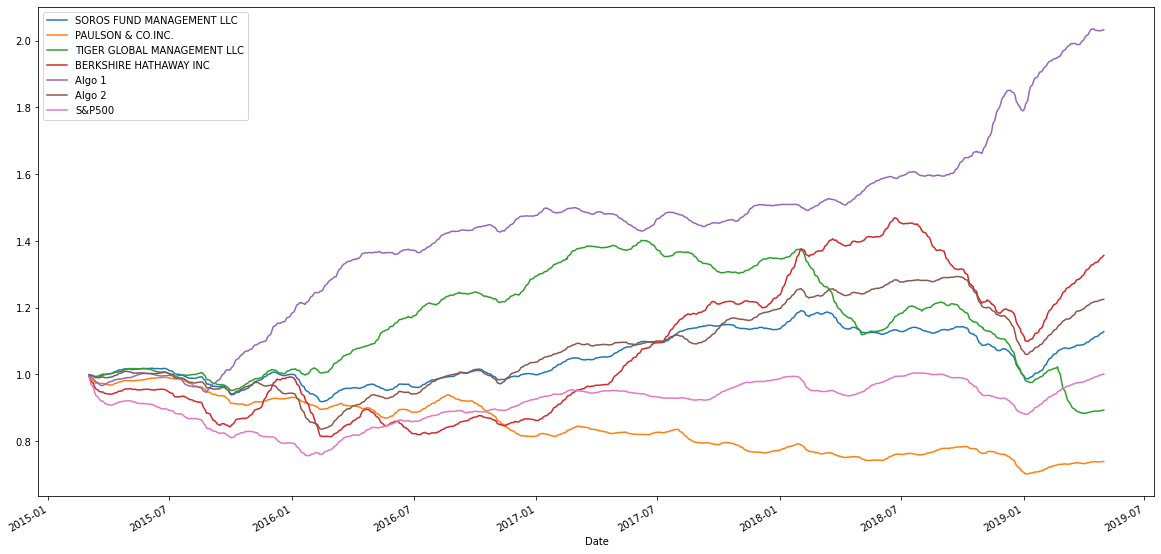

In [136]:
# Use `ewm` to calculate the rolling window
df_daily_ewm = df_daily.ewm(span = 21, adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [137]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252 / (df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P500                         0.195550
dtype: float64

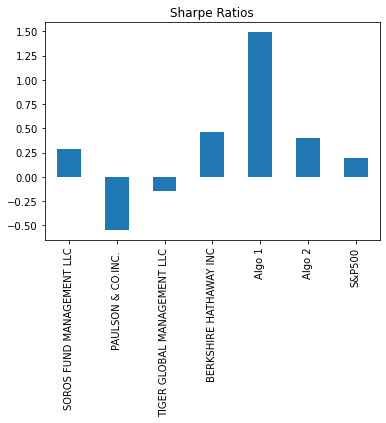

In [138]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [150]:
# Reading data from 1st stock
shop_historical = pd.read_csv(Path("Resources/shop_historical.csv"), index_col="Date", parse_dates = True, infer_datetime_format = True)
shop_historical.drop(columns = "Symbol", inplace=True)
shop_historical.rename(columns = {"Close":"Shop"}, inplace=True)
shop_historical.head()

,Shop
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [149]:
# Reading data from 2nd stock
otex_historical = pd.read_csv(Path("Resources/otex_historical.csv"), index_col="Date", parse_dates = True, infer_datetime_format = True)
otex_historical.drop(columns = "Symbol", inplace=True)
otex_historical.rename(columns = {"Close":"otex"}, inplace=True)
otex_historical.head()

,otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [147]:
# Reading data from 3rd stock
l_historical = pd.read_csv(Path("Resources/l_historical.csv"), index_col="Date", parse_dates = True, infer_datetime_format = True)
l_historical.drop(columns = "Symbol",inplace=True)
l_historical.rename(columns= {"Close":"L"}, inplace=True)
l_historical

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
...,...
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67


In [151]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat((shop_historical, otex_historical, l_historical), axis = 1, join = "inner")
all_stocks.sort_index(ascending=True, inplace=True)
all_stocks.head()

,Shop,otex,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [152]:
# Reset Date index
all_stocks.index = all_stocks.index.normalize()

In [153]:
# Calculate daily returns
all_daily_returns = all_stocks.pct_change()
# Drop NAs
all_daily_returns.dropna(inplace=True)
# Display sample data
all_daily_returns.head()

,Shop,otex,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [154]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
all_portfolio = all_stocks.dot(weights)
all_portfolio_returns = all_portfolio.pct_change()
all_portfolio_returns.dropna(inplace=True)
# Display sample data
all_portfolio_returns.head()

Date
2018-01-03    0.008561
2018-01-04    0.009167
2018-01-05   -0.002271
2018-01-08    0.005395
2018-01-09   -0.004570
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [155]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((all_portfolio_returns, df_daily), axis=1, join="inner")
portfolio_returns.rename(columns = {0:"all portfolio"}, inplace=True)
portfolio_returns

,all portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2018-01-03,0.008561,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.009167,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.002271,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.005395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.004570,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000388,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008558,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.009159,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [156]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,all portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2018-01-03,0.008561,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.009167,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.002271,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.005395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.004570,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000388,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008558,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.009159,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [157]:
# Calculate the annualized `std`
portfolio_std = portfolio_returns.std()
portfolio_std

all portfolio                  0.021782
SOROS FUND MANAGEMENT LLC      0.009177
PAULSON & CO.INC.              0.007203
TIGER GLOBAL MANAGEMENT LLC    0.013848
BERKSHIRE HATHAWAY INC         0.014328
Algo 1                         0.007561
Algo 2                         0.008672
S&P500                         0.006244
dtype: float64

### Calculate and plot rolling `std` with 21-day window

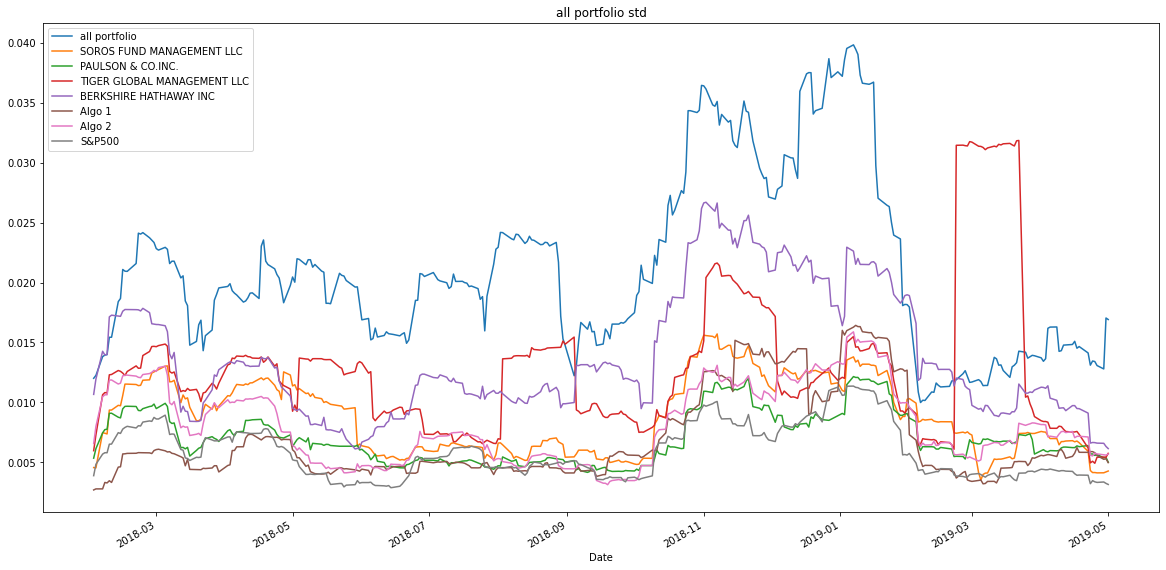

In [160]:
# Calculate rolling standard deviation
all_portfolio_rolling_21 = portfolio_returns.rolling(window = 21).std()
# Plot rolling standard deviation
all_portfolio_rolling_21.plot(figsize =(20,10), title="all portfolio std")

### Calculate and plot the correlation

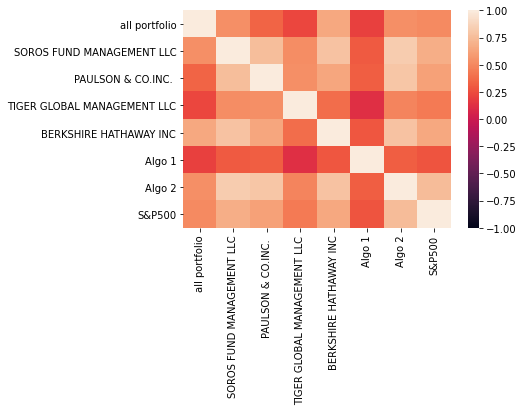

In [167]:
# Calculate and plot the correlation
all_portfolio_correlation = portfolio_returns.corr()
import seaborn as sns
sns.heatmap(all_portfolio_correlation, vmin=-1,vmax=1)

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

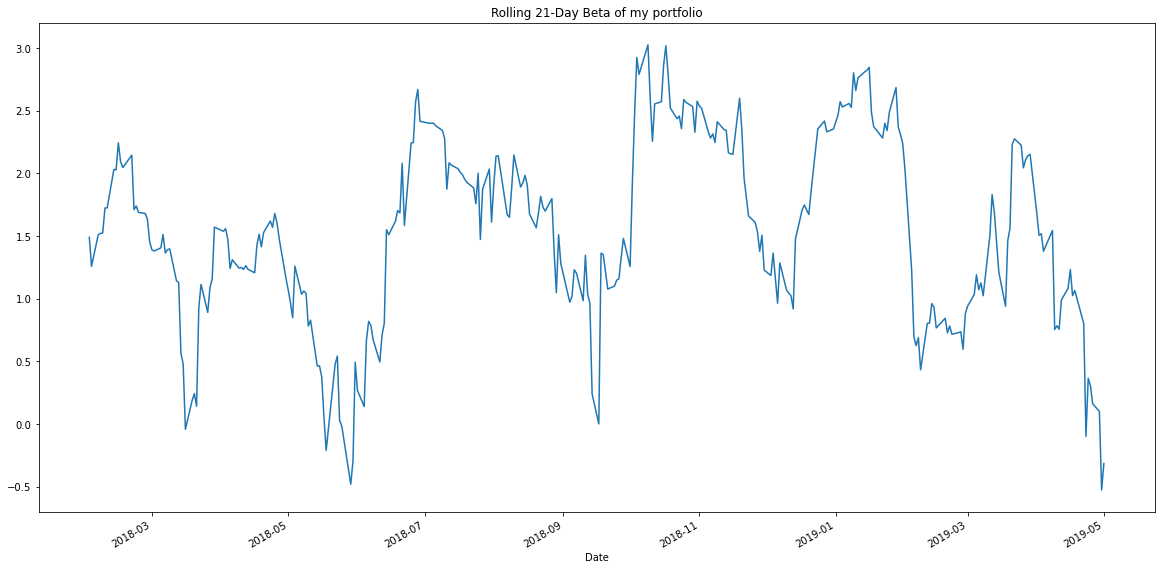

In [169]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns['all portfolio'].rolling(window=21).cov(portfolio_returns['S&P500'])
rolling_variance = portfolio_returns['S&P500'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [171]:
# Calculate Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))
sharpe_ratios

all portfolio                  1.763972
SOROS FUND MANAGEMENT LLC     -0.100620
PAULSON & CO.INC.             -0.452106
TIGER GLOBAL MANAGEMENT LLC   -1.587651
BERKSHIRE HATHAWAY INC         0.223505
Algo 1                         2.169322
Algo 2                         0.024408
S&P500                         0.039532
dtype: float64

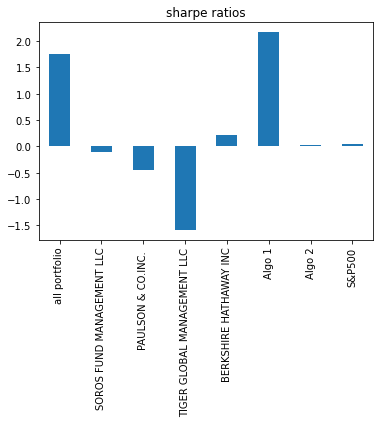

In [172]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar",title="sharpe ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio is highly recommended. 